### Data Source : https://www.kaggle.com/pankeshpatel/insurance

This project will predict whether a customer buy life insurance or not

#### Let's import Data

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### let's read data

In [80]:
data = pd.read_csv('insurance_data.csv')

In [81]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [82]:
data.columns

Index(['age', 'bought_insurance'], dtype='object')

In [83]:
data['bought_insurance'].value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

Observation:  14 customers bought life insurance and 13 customers did not buy life insurance. 1 indicates "Yes" and 0 indicates "NO"

In [84]:
data['age'].value_counts()

18    2
25    2
55    2
28    1
23    1
54    1
45    1
29    1
50    1
26    1
46    1
47    1
49    1
19    1
62    1
52    1
21    1
22    1
56    1
58    1
27    1
60    1
61    1
40    1
Name: age, dtype: int64

In [85]:
data.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [86]:
print("Is there any null value in dataset:",data.isnull().values.any())

Is there any null value in dataset: False


#### Data Visiualization

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [88]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


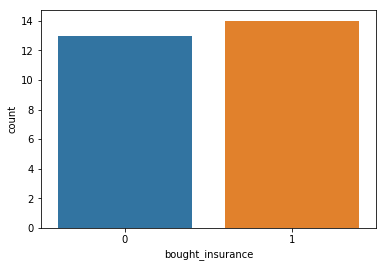

In [89]:
sns.countplot(data['bought_insurance'])

#### Taining the Model

In [90]:
X = data.drop(columns = 'bought_insurance')
Y = data['bought_insurance']

In [91]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=30)

In [92]:
x_train.shape

(18, 1)

In [93]:
x_test.shape

(9, 1)

In [94]:
y_train.shape

(18,)

In [95]:
y_test.shape

(9,)

In [96]:
model = LogisticRegression() #initialize the model with model variable
model.fit(x_train,y_train)


LogisticRegression()

#### Predicting the Model

In [97]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 0 0 0 1 1 1]
25    1
21    0
11    0
16    1
0     0
18    0
6     0
8     1
4     1
Name: bought_insurance, dtype: int64


In [98]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

Accuracy= 0.7777777777777778


#### Confusion Marix

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred)

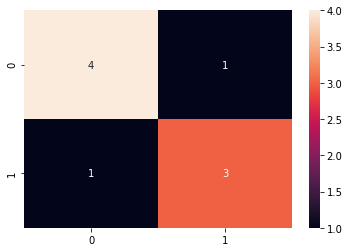

In [100]:
sns.heatmap(cm,annot=True)

Observation: We found TPR and TNR is high and 2 mis-classified point

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75         4

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



Observation : We found model accuracy is 78%